In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

Audio Classification Data Preprocessing

In [2]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [3]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


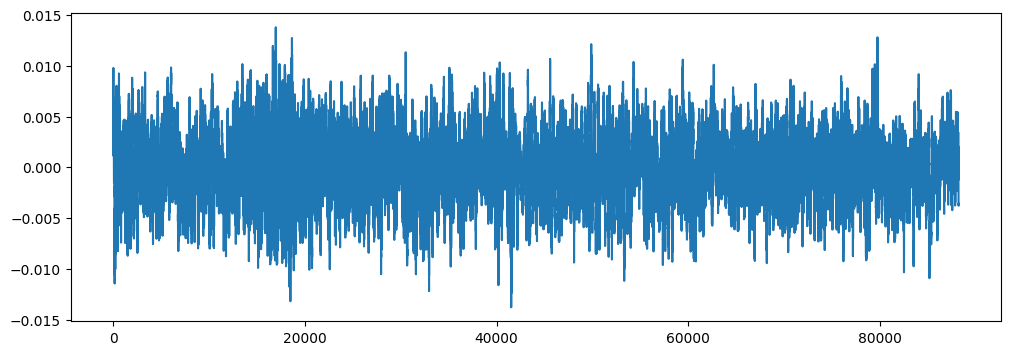

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [4]:
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [5]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [6]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

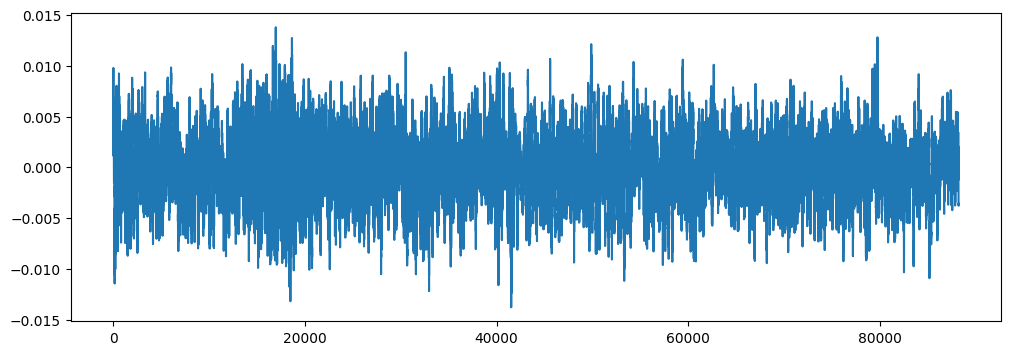

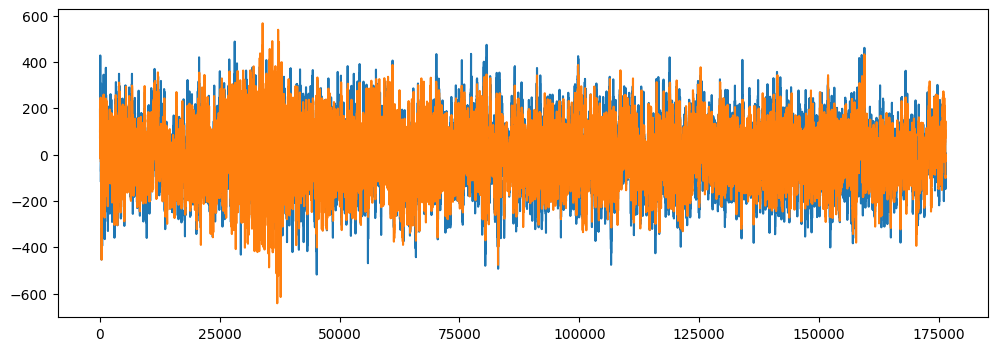

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [7]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [8]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [9]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085260e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125224e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299150e+02],
       [-1.8326149e+01, -2.4682453e+01, -3.0259777e+01, ...,
        -8.2357616e+00, -9.0665359e+00, -4.5019574e+00],
       ...,
       [-2.8760440e+00, -3.2479753e+00, -4.8965530e+00, ...,
        -5.2023673e-01,  3.5672522e+00,  7.4937577e+00],
       [-4.2968404e-01, -5.8838761e-01, -8.1724095e-01, ...,
         1.8340671e-01,  7.6732349e-01,  2.7120023e+00],
       [-1.1780632e+00,  6.9809496e-01,  6.3521605e+00, ...,
        -2.6221929e+00, -4.7912703e+00, -3.1826310e+00]], dtype=float32)

In [10]:
#### Extracting MFCC's For every audio file
import pandas as pd

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [11]:
import numpy as np

def features_extractor(file):
    audio, sample_rate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [12]:
import os
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [01:39, 33.77it/s]d:\python projects\audio_classification\venv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [04:08, 42.81it/s]d:\python projects\audio_classification\venv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
d:\python projects\audio_classification\venv\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [04:19, 33.65it/s]


In [13]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.581203, -122.81315, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043558, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86224, -42.658787, 50.690277,...",children_playing


In [14]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [15]:
X.shape

(8732, 40)

In [16]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [17]:
y=np.array(pd.get_dummies(y))

In [18]:
y

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False]])

In [19]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train

array([[-1.24484680e+02,  1.03169846e+02, -1.33165455e+01, ...,
         4.72908735e+00, -2.91925478e+00,  4.36318684e+00],
       [-5.13921928e+00,  7.90478210e+01,  4.16248989e+00, ...,
        -3.44017529e+00, -5.19278288e+00, -1.54999781e+00],
       [-4.03939552e+01, -1.31092958e+01, -7.20987606e+00, ...,
         1.99475384e+00, -8.70601475e-01,  2.89561892e+00],
       ...,
       [-4.26655701e+02,  9.15513382e+01,  4.19170332e+00, ...,
         9.74400163e-01,  5.15445411e-01,  9.15374756e-01],
       [-1.37251968e+02,  1.24268539e+02, -2.15997734e+01, ...,
         1.25008643e+00, -1.89575124e+00, -9.01497304e-01],
       [-4.18389374e+02,  2.06862335e+02,  7.23461771e+00, ...,
        -3.98612165e+00, -4.71784496e+00, -2.78926134e-01]], dtype=float32)

In [20]:
X_test.shape

(1747, 40)

In [21]:
y_train.shape

(6985, 10)

In [22]:
y_test.shape

(1747, 10)

Model creation

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [24]:
### No of classes
num_labels=y.shape[1]
num_labels

10

In [25]:
model=Sequential()

###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [27]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [28]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 150
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/150
203/219 [==========================>...] - ETA: 0s - loss: 11.9589 - accuracy: 0.1133  
Epoch 1: val_loss improved from inf to 2.28748, saving model to saved_models\audio_classification.hdf5
219/219 [=====================

In [29]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7973669171333313


In [30]:
# Load the audio file and extract MFCC features
filename = "UrbanSound8K/test/Dog_bark.wav"
audio, sample_rate = librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape the features
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Make predictions using the loaded model
predictions = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predictions)

# Map the predicted label index to the actual class label
class_names = ['Air Conditioner', 'Car Horn', 'Children Playing', 'Dog Bark',
               'Drilling', 'Engine Idling', 'Gun Shot', 'Jackhammer', 'Siren',
               'Street Music']
prediction_class = class_names[predicted_label]

print(prediction_class)

1/1 [==============================] - 0s 409ms/step
Dog Bark


In [31]:
#model.save('final_model1.h5')